# 선형 회귀 (Linear Regression)

- 선형 관계를 가지고 있는 데이터 (Linear Data)
- 선형 모델 (Linear Model)
- y = 2x+3

In [1]:
# 파이토치가 설치되어 있는지 확인해줍니다.
# !pip3 install torch torchvision

## 필요한 라이브러리를 불러옵니다.

In [2]:
# 넘파이와 파이토치를 불러옵니다.
import numpy as np
import torch

# Neural Network의 약자로 인공신경망 연산들이 들어가 있습니다. (ex. Linear, Convolution, RNN 등등)
import torch.nn as nn

# 모델을 최적화 하는데 필요한 최적화 함수들이 들어가 있습니다 (ex. SGD, ADAM, LBFGS 등등)
import torch.optim as optim

# 텐서를 초기화 하는 함수들이 들어가 있습니다. (ex. uniform, normal, xavier 등등)
import torch.nn.init as init

# 데이터나 학습 결과를 출력하기 위해 사용합니다.
import matplotlib.pyplot as plt

## 데이터 생성

In [3]:
# 데이터의 개수는 1000개, 학습 횟수는 500회로 지정해줍니다. 
# 이는 임의로 지정한 수치입니다.

num_data = 1000
num_epoch = 500

# 데이터에 추가할 노이즈를 정규분포를 따르게 만들어줍니다. 
# 이때 평균은 default로 0, 편차는 0.2로 임의로 지정했습니다.
noise = init.normal_(torch.FloatTensor(num_data, 1), std = 0.2)

# x 는 -10에서 10에서 uniform 하게 생성합니다.
# 이렇게 되면 x는 1000 x 1 형태를 가지고 -10에서 10 사이의 값들을 uniform 하게 갖게 됩니다.
x = init.uniform_(torch.Tensor(num_data, 1), -10, 10)

# 연산 그래프를 정의합니다.
y = 2 * x + 3

# y에 노이즈를 더해 y_noise를 만들어줍니다. 
# 학습 시, y_noise를 목표값으로 사용합니다.
# 이렇게 하는 이유는 실제 데이터를 사용할 때, 여러 측정과정에서 노이즈가 추가되는 경우가 많기 때문입니다.
y_noise = y + noise

## 데이터 시각화

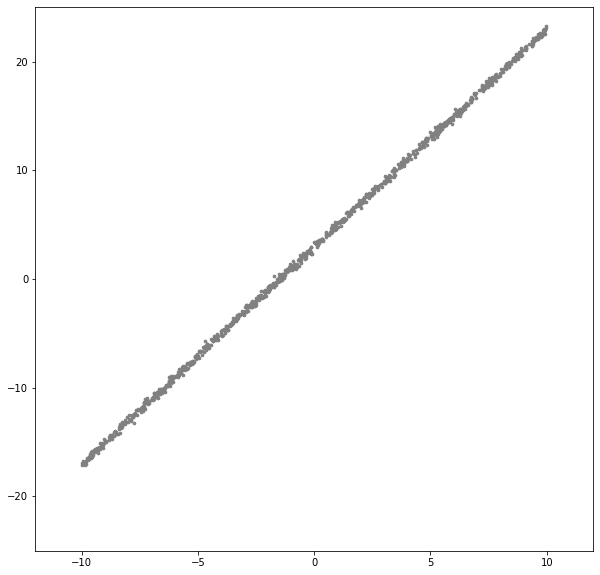

In [4]:
# https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html
# matplotlib의 scatter 함수를 사용해 학습 데이터를 확인합니다.

# figure의 크기를 지정해줍니다.
plt.figure(figsize = (10, 10))

# x축에는 x를 사용하고 y축에는 y_noise를 사용해 scatter plot을 그려줍니다.
# 이때 점의 크기는 7, 점의 색상은 회색으로 임의로 지정했습니다.
plt.scatter(x.numpy(), y_noise.numpy(), s = 7, c = 'gray') # numpy() 함수를 사용하여 텐서를 넘파이 배열로 변환

# figure의 x, y 축 범위를 지정해줍니다.
plt.axis([-12, 12, -25, 25])

# figure를 출력합니다.
plt.show()

## 모델, 손실함수, 최적화 함수 설정

In [5]:
# 선형 모델을 생성합니다.
# 입력으로 들어오는 x가 1000 x 1 의 형태를 가지고 있고, 여기서 특성의 개수는 1개이기 때문에 앞에 1이 들어가게 됩니다. >> Linear(1, ?)
# 출력으로 기대하는 값 또한 1000 x 1 의 형태이기 때문에 특성의 개수가 1개이다. 그렇기 때문에 뒤에 1이 들어갑니다. >> Linear(?, 1)
model = nn.Linear(1, 1)

# 손실 함수를 지정해줍니다.
# 임의로 L1 손실을 사용했습니다.
loss_func = nn.L1Loss()

# 최적화 함수를 지정해줍니다.
# 이때 인수로 학습의 대상이 되는 모델의 변수(model.parameters())를 전달합니다.
# 학습률은 0.01로 임의로 지정했습니다.
optimizer = optim.SGD(model.parameters(), lr = 0.01)

## 모델 학습 및 중간 확인

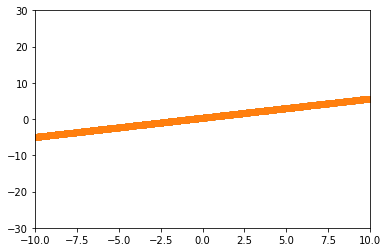

tensor(7.4545)


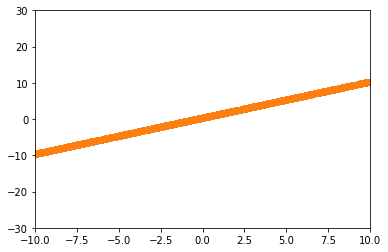

tensor(5.2756)


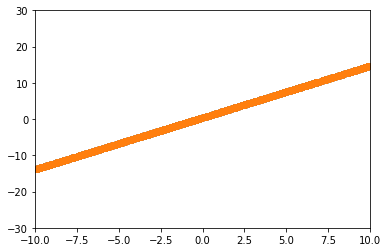

tensor(3.4290)


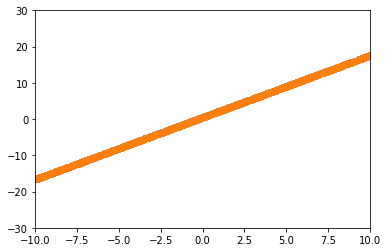

tensor(2.5465)


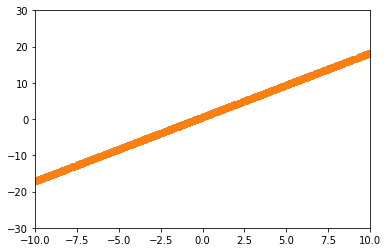

tensor(2.4203)


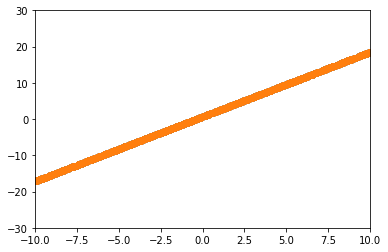

tensor(2.3215)


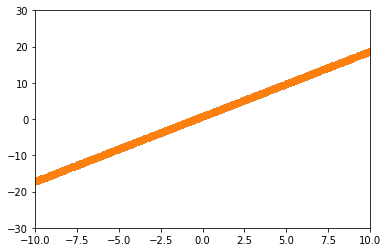

tensor(2.2229)


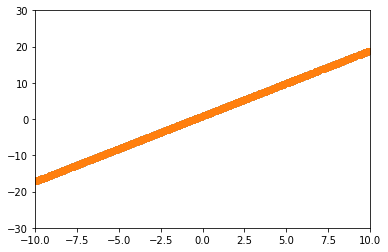

tensor(2.1243)


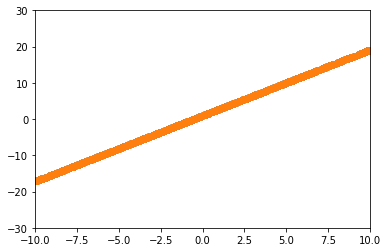

tensor(2.0257)


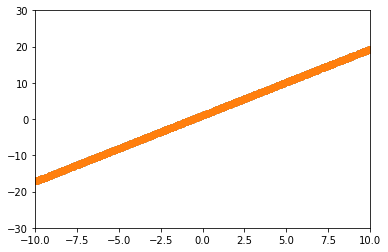

tensor(1.9271)


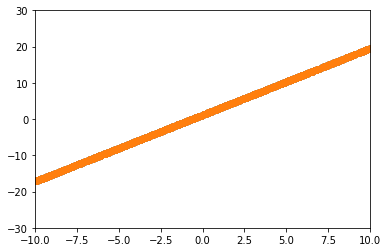

tensor(1.8285)


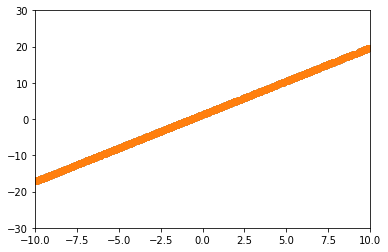

tensor(1.7299)


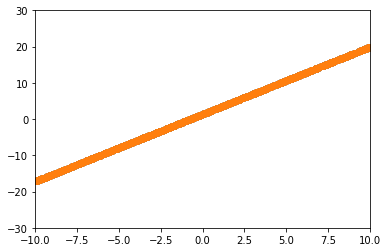

tensor(1.6313)


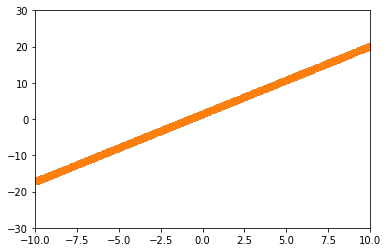

tensor(1.5327)


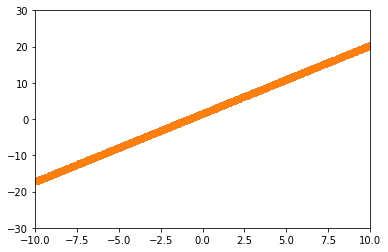

tensor(1.4341)


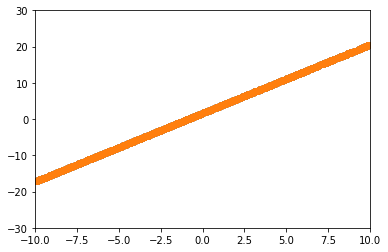

tensor(1.3355)


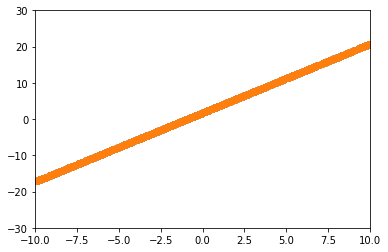

tensor(1.2369)


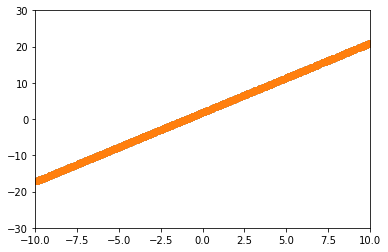

tensor(1.1383)


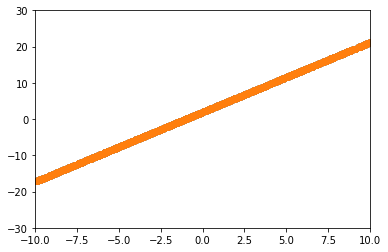

tensor(1.0398)


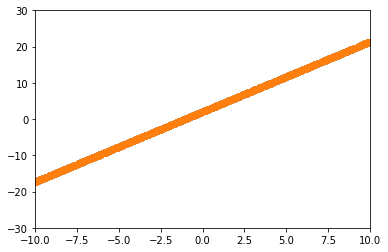

tensor(0.9414)


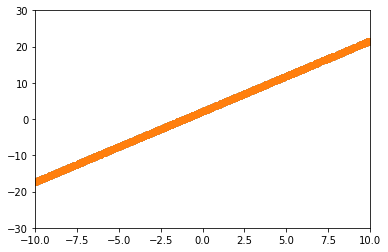

tensor(0.8431)


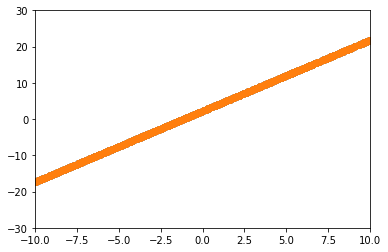

tensor(0.7448)


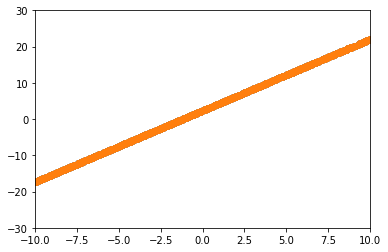

tensor(0.6467)


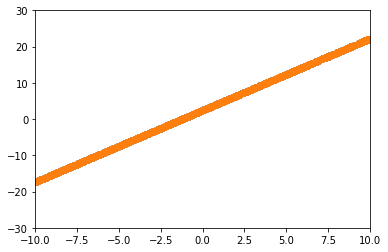

tensor(0.5487)


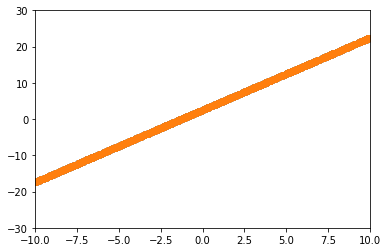

tensor(0.4517)


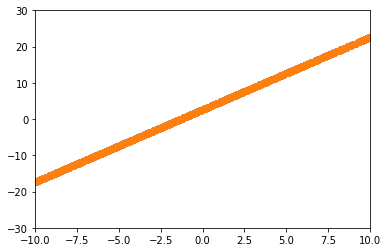

tensor(0.3615)


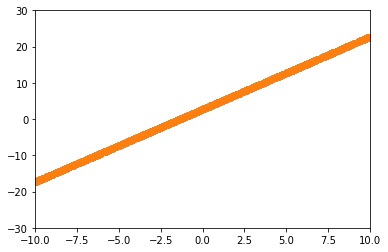

tensor(0.2864)


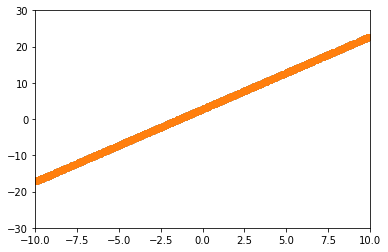

tensor(0.2346)


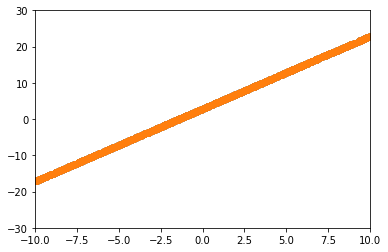

tensor(0.2036)


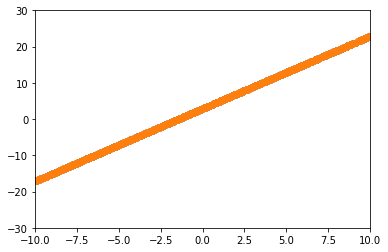

tensor(0.1857)


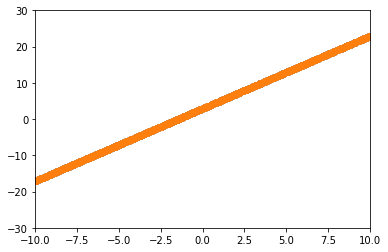

tensor(0.1768)


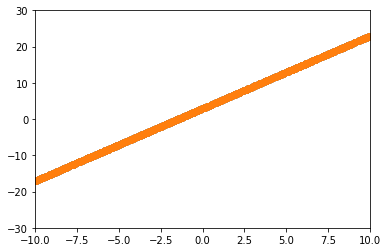

tensor(0.1724)


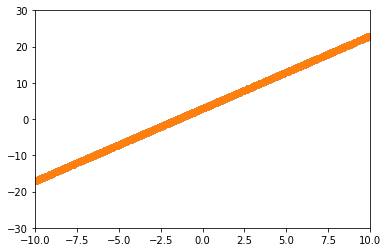

tensor(0.1700)


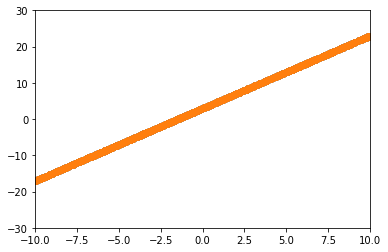

tensor(0.1690)


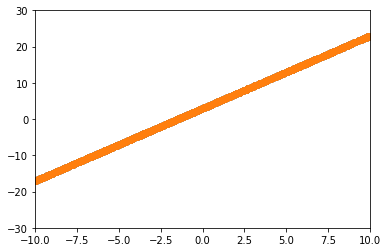

tensor(0.1684)


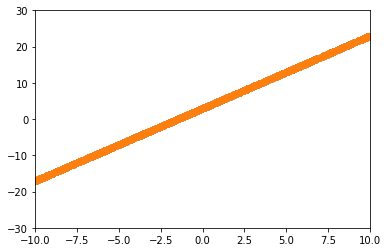

tensor(0.1681)


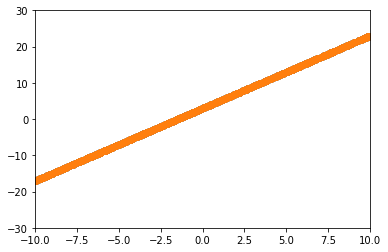

tensor(0.1679)


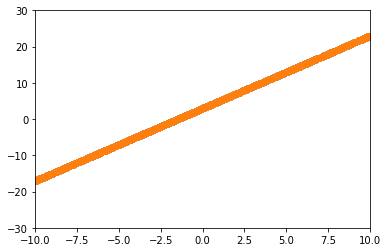

tensor(0.1679)


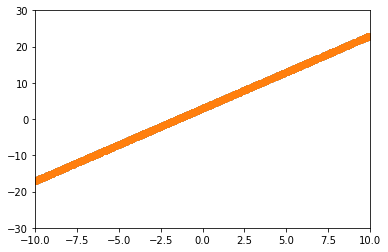

tensor(0.1678)


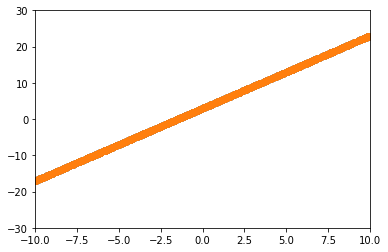

tensor(0.1678)


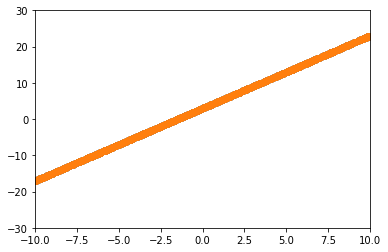

tensor(0.1678)


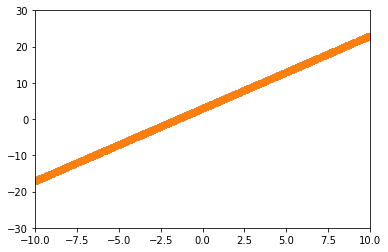

tensor(0.1678)


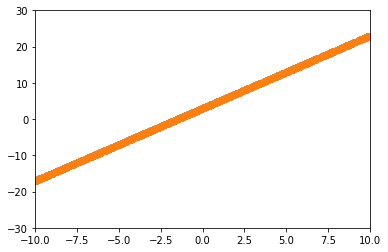

tensor(0.1678)


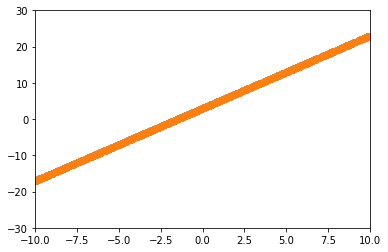

tensor(0.1678)


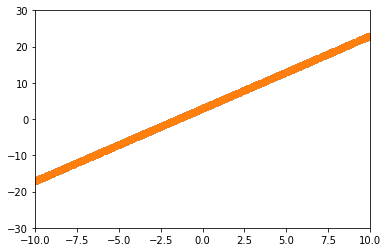

tensor(0.1678)


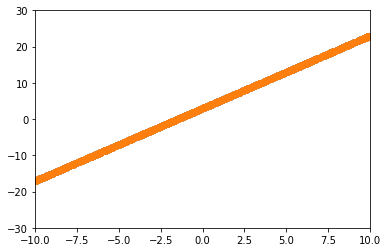

tensor(0.1678)


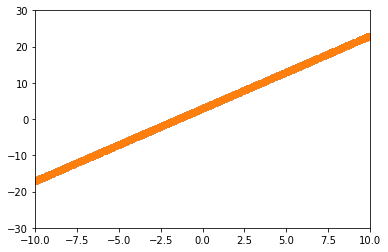

tensor(0.1678)


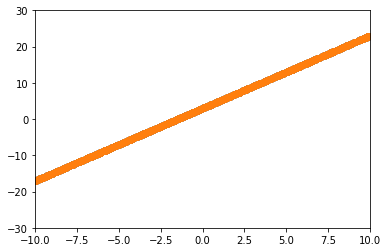

tensor(0.1678)


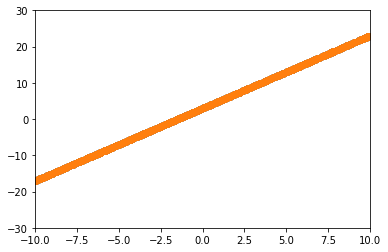

tensor(0.1678)


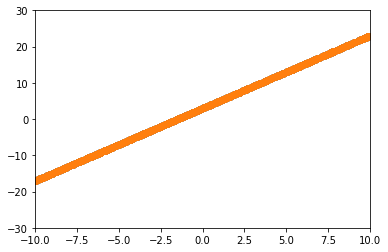

tensor(0.1678)


In [6]:
# 손실이 어떻게 변하는지 확인하기 위해 loss_arr를 만들어 기록합니다.
loss_arr = []

# 목표값은 y_noise로 지정해줍니다.
label = y_noise

# 500(num_epoch)으로 지정했던 학습 횟수만큼 반복합니다.
for i in range(num_epoch):
  # 이전 학습의 기울기를 지우고 최적화 함수를 초기화해줍니다.
  # 기울기를 초기화해야 새로운 가중치와 편차에 대해서 새로운 기울기를 구할 수 있기 때문입니다.
  optimizer.zero_grad()

  # 입력값 x를 모델에 넣어 결과값을 얻습니다.
  output = model(x)

  # 결과값과 목표값의 차이를 L1 손실 함수로 구해줍니다.
  loss = loss_func(output, label)

  # 손실에 대한 기울기를 구합니다.
  loss.backward()

  # 구한 기울기를 이용해 모델의 변수를 업데이트 합니다.
  optimizer.step()

  # 10번 마다 모델의 변수가 어떻게 변하고 있는지 출력해줍니다.
  if i % 10 == 0:
    # https://pytorch.org/docs/stable/tensors.html?highlight=detach#torch.Tensor.detach
    # 현재 연산 그래프에 속해있는 x, output 값을 detach를 통해 분리하고, 텐서를 넘파이 배열로 바꿔서 plt.scatter에 전달합니다.
    plt.scatter(x.detach().numpy(), output.detach().numpy())


    
    # 10번 마다 모델의 변수가 어떻게 변하고 있는지 출력해줍니다.
    if i % 10 == 0:
        # https://pytorch.org/docs/stable/tensors.html?highlight=detach#torch.Tensor.detach
        # 텐서에 대하여 기록(history) 추적을 중지하기 위해 현재 연산 그래프에 속해있는 x, output 값을 detach를 통해 분리하고, 텐서를 넘파이 배열로 바꿔서 plt.scatter에 전달합니다.
        plt.scatter(x.detach().numpy(),output.detach().numpy())
        plt.axis([-10, 10, -30, 30])
        plt.show()
        print(loss.data) # loss.data는 (1,) 모양의 텐서
    
    # 손실을 loss_arr에 추가해줍니다.
    loss_arr.append(loss.detach().numpy())

## 학습 후 데이터와 모델 결과값 확인

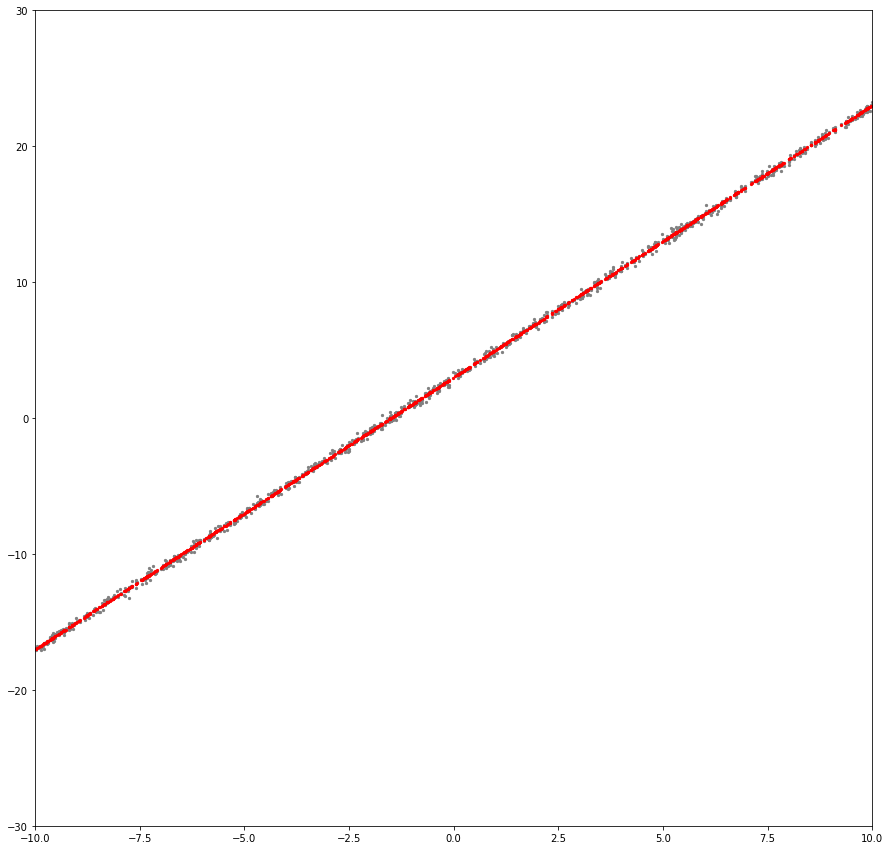

In [7]:
plt.figure(figsize = (15, 15))
plt.scatter(x.numpy(), y_noise.numpy(), s = 5, c = 'gray')
plt.scatter(x.detach().numpy(), output.detach().numpy(), s = 5, c = 'red')
plt.axis([-10, 10, -30, 30])
plt.show()

## 손실 그래프

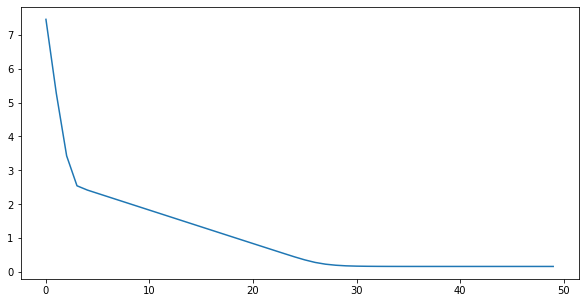

In [8]:
# matplotlib의 plot 함수를 이용해 손실이 어떻게 줄어가는지 확인합니다. 
plt.figure(figsize = (10, 5))
plt.plot(loss_arr)
plt.show()

## 학습 후 모델 변수 값 확인

In [9]:
# 현재 모델은 weight와 bias을 변수로 가지고 있는데, 그 값들이 학습 후 실제로 몇인지 수치적으로 확인해봅니다.
param_list = list(model.parameters())
print('Weight:', param_list[0].item(), '\nBias:', param_list[1].item())

Weight: 2.0019564628601074 
Bias: 3.0088300704956055
